<a href="https://colab.research.google.com/github/suyash202125/Minor-Project/blob/main/Entrepreneurial_Exit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv('GEMIRAN0819.csv')
df

,Unnamed: 0,yrsurv,age,gender,irstrata,fearfail,suskill,opport,knowent,discent,exreason,bstart
0,3,2008,28,2,2,2,1,1,1,0,0,1
1,20,2008,38,1,2,2,1,1,1,0,0,1
2,25,2008,26,2,6,2,1,1,1,0,0,1
3,30,2008,25,1,6,2,1,1,2,0,0,2
4,35,2008,45,1,2,-1,2,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12095,39411,2019,54,2,6,1,1,2,1,0,0,1
12096,39414,2019,21,2,6,1,2,2,1,0,0,1
12097,39416,2019,24,2,6,2,1,1,1,0,0,1
12098,39429,2019,31,2,6,2,1,2,2,0,0,1


In [99]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,yrsurv,age,gender,irstrata,fearfail,suskill,opport,knowent,discent,exreason,bstart
0,2008,28,2,2,2,1,1,1,0,0,1
1,2008,38,1,2,2,1,1,1,0,0,1
2,2008,26,2,6,2,1,1,1,0,0,1
3,2008,25,1,6,2,1,1,2,0,0,2
4,2008,45,1,2,-1,2,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12095,2019,54,2,6,1,1,2,1,0,0,1
12096,2019,21,2,6,1,2,2,1,0,0,1
12097,2019,24,2,6,2,1,1,1,0,0,1
12098,2019,31,2,6,2,1,2,2,0,0,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   yrsurv    12100 non-null  int64
 1   age       12100 non-null  int64
 2   gender    12100 non-null  int64
 3   irstrata  12100 non-null  int64
 4   fearfail  12100 non-null  int64
 5   suskill   12100 non-null  int64
 6   opport    12100 non-null  int64
 7   knowent   12100 non-null  int64
 8   discent   12100 non-null  int64
 9   exreason  12100 non-null  int64
 10  bstart    12100 non-null  int64
dtypes: int64(11)
memory usage: 1.0 MB


(11.5, -0.5)

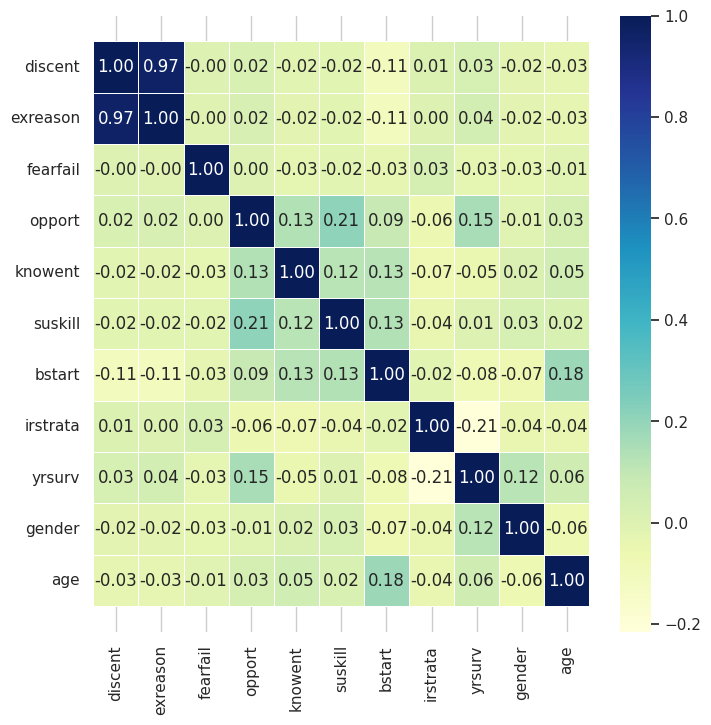

In [101]:
#Let's make our correlation matrix a little prettier

corr_matrix = df[['discent', 'exreason', 'fearfail', 'opport', 'knowent',
                  'suskill', 'bstart', 'irstrata', 'yrsurv', 'gender', 'age']].corr(method= 'spearman')

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True, linewidths = 0.5,
                 fmt = ".2f", cmap = "YlGnBu");
bottom, top = ax. get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [102]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns = df['discent'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])
irstrata_table.reset_index(inplace=True)

In [103]:
irstrata_table.style.background_gradient(cmap='Blues')

discent,irstrata,0,1
0,1,1991,172
1,2,2440,252
2,3,2167,200
3,4,1487,162
4,5,1765,190
5,6,1172,102


In [104]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['fearfail'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])
irstrata_table.reset_index(inplace=True)

In [105]:
irstrata_table.style.background_gradient(cmap='Blues')

fearfail,irstrata,-2,-1,0,1,2
0,1,4,33,4,811,1311
1,2,23,60,33,921,1655
2,3,19,155,2,661,1530
3,4,9,110,7,512,1011
4,5,12,70,8,569,1296
5,6,8,28,2,382,854


In [106]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['bstart'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])
irstrata_table.reset_index(inplace=True)

In [107]:
irstrata_table.style.background_gradient(cmap='Blues')

bstart,irstrata,-2,-1,1,2
0,1,4,4,944,1211
1,2,4,3,1261,1424
2,3,1,6,1055,1305
3,4,0,3,737,909
4,5,6,13,930,1006
5,6,3,6,589,676


In [108]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['knowent'], margins_name="Total")
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])
irstrata_table.reset_index(inplace=True)

In [109]:
irstrata_table.style.background_gradient(cmap='Blues')

knowent,irstrata,-2,-1,0,1,2
0,1,5,15,0,1097,1046
1,2,12,45,2,1497,1136
2,3,14,54,0,1162,1137
3,4,6,28,1,943,671
4,5,13,39,1,1134,768
5,6,5,25,2,792,450


In [110]:
pd.crosstab(df.irstrata, df['knowent'], margins=True,
            margins_name="Total").style.background_gradient(cmap='Blues')

knowent,-2,-1,0,1,2,Total
irstrata,,,,,,
1,5,15,0,1097,1046,2163
2,12,45,2,1497,1136,2692
3,14,54,0,1162,1137,2367
4,6,28,1,943,671,1649
5,13,39,1,1134,768,1955
6,5,25,2,792,450,1274
Total,55,206,6,6625,5208,12100


In [111]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['suskill'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])
irstrata_table.reset_index(inplace=True)

In [112]:
irstrata_table.style.background_gradient(cmap='Blues')

suskill,irstrata,-2,-1,0,1,2
0,1,9,19,9,1496,630
1,2,22,52,30,2001,587
2,3,21,245,6,1549,546
3,4,5,109,2,1204,329
4,5,11,60,10,1355,519
5,6,26,51,2,906,289


In [113]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['opport'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])*100
irstrata_table.reset_index(inplace=True)

In [114]:
irstrata_table.style.background_gradient(cmap='Blues')

opport,irstrata,-2,-1,0,1,2
0,1,11,110,7,783,1252
1,2,18,254,43,1002,1375
2,3,41,409,7,824,1086
3,4,6,212,7,629,795
4,5,15,161,12,727,1040
5,6,19,183,3,465,604


In [115]:
irstrata_table = pd.crosstab(index=df['irstrata'], columns=df['gender'])
#irstrata_table['ratio'] = irstrata_table[1]/(irstrata[0]+irstrata_table[1])*100
irstrata_table.reset_index(inplace=True)

In [116]:
pd.crosstab(df.opport, df['discent'], margins=True,
            margins_name="Total").style.background_gradient(cmap='Blues')

discent,0,1,Total
opport,,,
-2,106,4,110
-1,1264,65,1329
0,71,8,79
1,3982,448,4430
2,5599,553,6152
Total,11022,1078,12100


In [117]:
pd.crosstab(df.gender, df['exreason'], margins=True,
            margins_name="Total").style.background_gradient(cmap='Blues')

exreason,0,1,2,3,4,5,6,7,8,9,10,Total
gender,,,,,,,,,,,,
1,8398,13,110,7,29,35,141,37,354,61,17,9202
2,2683,5,50,2,2,8,41,11,70,24,2,2898
Total,11081,18,160,9,31,43,182,48,424,85,19,12100


In [118]:
pd.crosstab(df.exreason, df['discent']).style.background_gradient(cmap='Blues')

discent,0,1
exreason,,
0,11019,62
1,0,18
2,1,159
3,0,9
4,0,31
5,0,43
6,0,182
7,0,48
8,1,423


In [119]:
yrsurv_table=pd.crosstab(index=df['yrsurv'], columns=df['discent'])
#yrsurv_table['ratio']=yrsurv_table[1]/(yrsurv_table[0]+yrsurv_table[1])
yrsurv_table.reset_index(inplace=True)

In [120]:
yrsurv_table.style.background_gradient(cmap='Blues')

discent,yrsurv,0,1
0,2008,621,56
1,2009,761,76
2,2010,1054,88
3,2011,1239,92
4,2012,687,56
5,2013,969,87
6,2014,860,88
7,2015,1036,116
8,2016,1202,140
9,2017,998,111


In [121]:
yrsurv_table=pd.crosstab(index=df['yrsurv'], columns=df['exreason'])
#yrsurv_table['ratio']=yrsurv_table[1]/(yrsurv_table[0]+yrsurv_table[1])
yrsurv_table.reset_index(inplace=True)

In [122]:
yrsurv_table.style.background_gradient(cmap='Blues')

exreason,yrsurv,0,1,2,3,4,5,6,7,8,9,10
0,2008,622,0,6,1,4,4,10,1,19,8,2
1,2009,779,0,10,0,4,2,12,1,17,10,2
2,2010,1058,0,11,0,5,8,21,1,32,5,1
3,2011,1264,0,17,4,7,4,4,4,21,5,1
4,2012,688,0,11,0,0,2,9,6,19,8,0
5,2013,970,0,7,0,1,0,22,9,39,5,3
6,2014,860,0,17,0,1,0,15,4,45,4,2
7,2015,1039,3,21,1,3,3,18,4,52,7,1
8,2016,1203,3,25,1,3,8,16,5,63,10,5
9,2017,998,4,13,0,0,6,19,8,52,8,1


In [123]:
category = pd.cut(df.age,
                  bins=[18, 25, 35, 45, 55, 65, 99],
                  labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
df.insert(5, 'Age-Group', category)

In [124]:
df

,yrsurv,age,gender,irstrata,fearfail,Age-Group,suskill,opport,knowent,discent,exreason,bstart
0,2008,28,2,2,2,25-34,1,1,1,0,0,1
1,2008,38,1,2,2,35-44,1,1,1,0,0,1
2,2008,26,2,6,2,25-34,1,1,1,0,0,1
3,2008,25,1,6,2,18-24,1,1,2,0,0,2
4,2008,45,1,2,-1,35-44,2,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12095,2019,54,2,6,1,45-54,1,2,1,0,0,1
12096,2019,21,2,6,1,18-24,2,2,1,0,0,1
12097,2019,24,2,6,2,18-24,1,1,1,0,0,1
12098,2019,31,2,6,2,25-34,1,2,2,0,0,1


<Axes: xlabel='gender'>

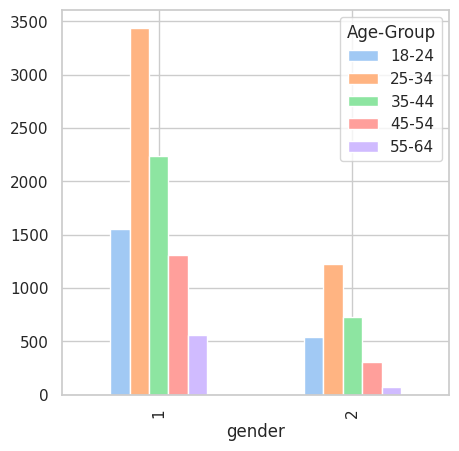

In [125]:
pd.crosstab(df.gender, df['Age-Group'], margins=False).plot(kind='bar')

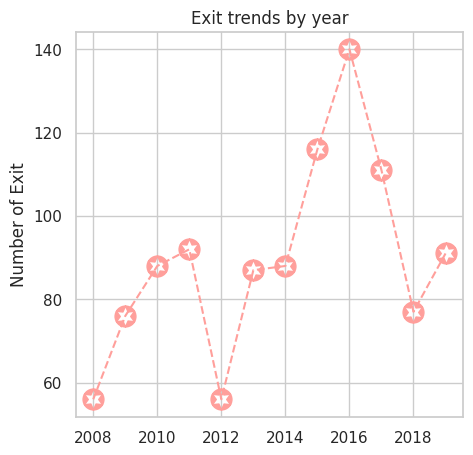

In [126]:
import matplotlib.path as mpath
q =df.groupby('yrsurv').agg({'discent' : 'sum'})

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()

# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

figsize = (8, 8)
plt.plot(q, '--r', marker=cut_star, markersize=15)

plt.ylabel('Number of Exit')
plt.title('Exit trends by year')
plt.show()

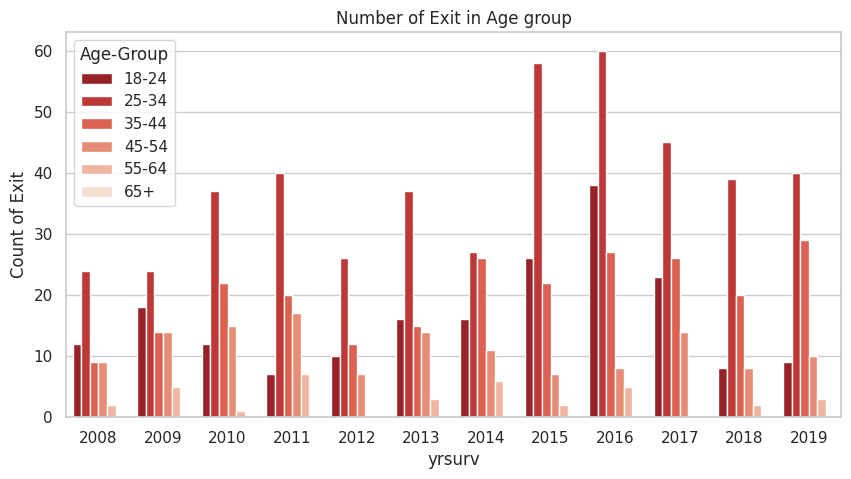

In [127]:
fig = plt.subplots(figsize=(10,5))

sns.countplot(x = df.yrsurv[df.discent==1], hue=df['Age-Group'][df.discent==1], palette="Reds_r");

#sns.countplot(df1.yrsurv[df.discent==0], hue=df['Age_Group'][df.discent==0], palette="Blues_r");
plt.ylabel('Count of Exit')
plt.title('Number of Exit in Age group')
plt.show()

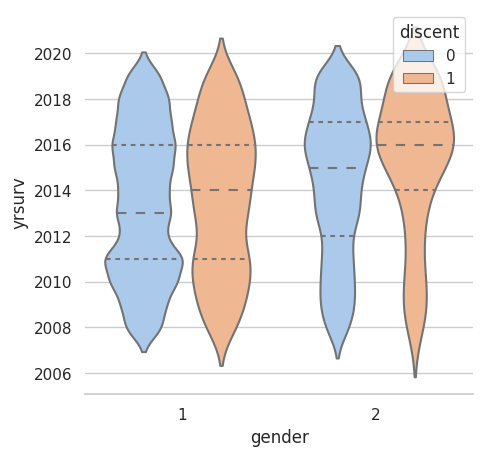

In [128]:
sns.set(style="whitegrid", palette="pastel")

#Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y = "yrsurv", hue='discent',
               split=False, inner='quart', data=df)
sns.despine(left=True)

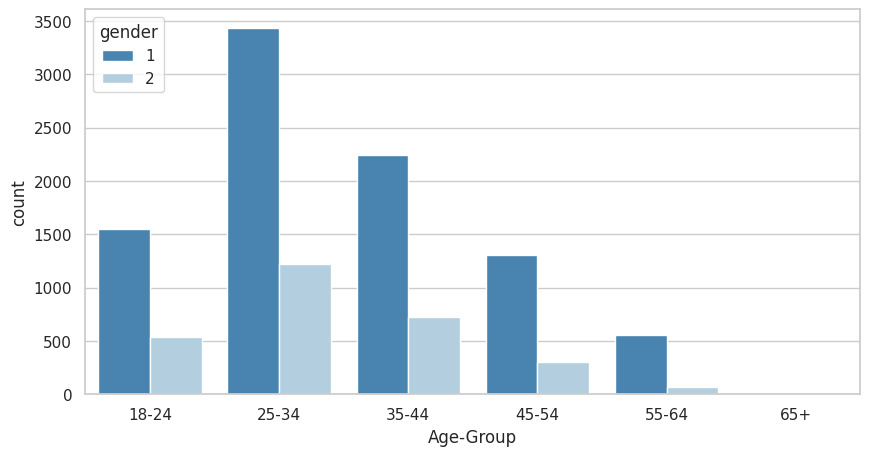

In [129]:
fig = plt.subplots(figsize=(10,5))

sns.countplot(x=df['Age-Group'], hue=df['gender'], palette="Blues_r");
#sns.countplot(x=df['Age-Group'], hue=df['gender'], palette="Reds_r");

0    11022
1     1078
Name: discent, dtype: int64


<Axes: ylabel='count'>

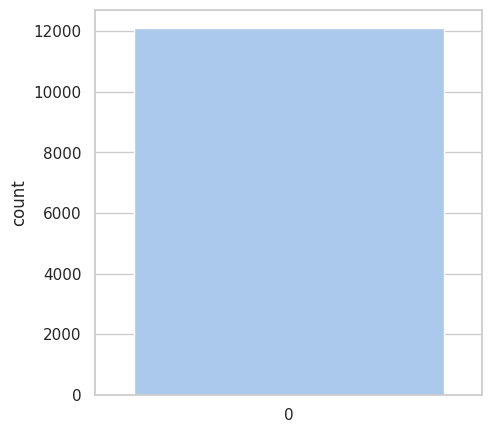

In [130]:
print(df.discent.value_counts())

sns.countplot(df.discent)

Text(0.5, 1.0, 'Percentage of Exit in Business')

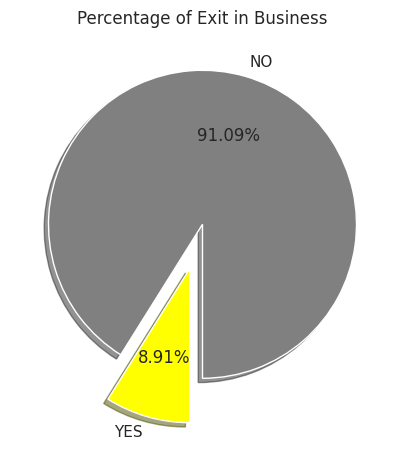

In [131]:
from pylab import rcParams

#Data to plot
sizes = df['discent'].value_counts(sort = True)
colors = ["grey", "yellow"]
rcParams['figure.figsize'] = 5,5 #plot

plt.pie(sizes, explode = (0, 0.3), labels=["NO", "YES"], colors = colors,
        autopct='%.2f%%', shadow=True, startangle=270)
plt.title('Percentage of Exit in Business')

In [132]:
df=df.drop(['Age-Group'], axis=1)

In [133]:
df

,yrsurv,age,gender,irstrata,fearfail,suskill,opport,knowent,discent,exreason,bstart
0,2008,28,2,2,2,1,1,1,0,0,1
1,2008,38,1,2,2,1,1,1,0,0,1
2,2008,26,2,6,2,1,1,1,0,0,1
3,2008,25,1,6,2,1,1,2,0,0,2
4,2008,45,1,2,-1,2,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12095,2019,54,2,6,1,1,2,1,0,0,1
12096,2019,21,2,6,1,2,2,1,0,0,1
12097,2019,24,2,6,2,1,1,1,0,0,1
12098,2019,31,2,6,2,1,2,2,0,0,1


In [134]:
x=df.drop(['discent'], axis=1)
y=df.discent

In [135]:
print(x.shape, y.shape)

(12100, 10) (12100,)


In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=1)
#0.25 x 0.8 = 0.2

print('valid', x_val.shape, y_val.shape)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

valid (2541, 10) (2541,)
Train (5929, 10) (5929,)
Test (3630, 10) (3630,)


In [137]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import sklearn

In [138]:
y_train.value_counts()

0    5394
1     535
Name: discent, dtype: int64

In [139]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train , y_train)

In [140]:
np.bincount(y_train)

array([5394, 5394])

<Axes: xlabel='discent', ylabel='count'>

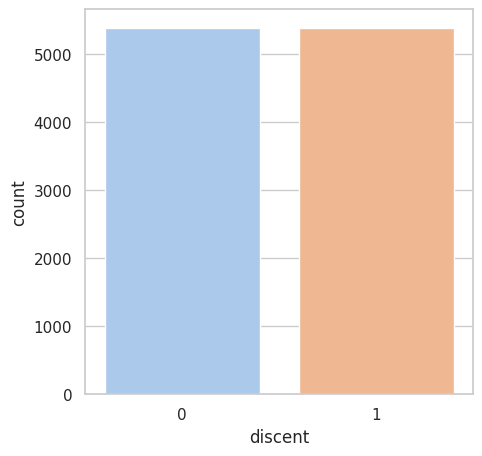

In [141]:
sns.countplot(x=y_train)

In [142]:
x_train.shape

(10788, 10)

In [143]:
y_train.value_counts()

0    5394
1    5394
Name: discent, dtype: int64

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, average_precision_score, precision_recall_curve, f1_score, roc_curve, auc

In [145]:
#Linear Regression
lm = LinearRegression()

lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

lm.score(x_test, y_test)

0.5265421323505555

In [146]:
#Logistic Regression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(x_train, y_train)
lr_pred=lr_c.predict(x_val)
lr_cm=confusion_matrix(y_val, lr_pred)
lr_ac=accuracy_score(y_val, lr_pred)

In [147]:
#Random Forest
rdf_c=RandomForestClassifier(n_estimators=110, criterion='entropy', random_state=0)
rdf_c.fit(x_train, y_train)
rdf_pred=rdf_c.predict(x_val)
rdf_cm=confusion_matrix(y_val, rdf_pred)
rdf_ac=accuracy_score(rdf_pred, y_val)

In [148]:
#Decision Tree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree_c.fit(x_train, y_train)
dtree_pred=dtree_c.predict(x_val)
dtree_cm=confusion_matrix(y_val, dtree_pred)
dtree_ac=accuracy_score(dtree_pred, y_val)

In [149]:
#XGBoost
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred=XGB.predict(x_val)
XGB_cm=confusion_matrix(y_val, XGB_pred)
XGB_ac=accuracy_score(XGB_pred, y_val)

In [150]:
#SVM
svm_c=SVC(C=1.0)
svm_c.fit(x_train, y_train)
svm_pred=svm_c.predict(x_val)
svm_cm = confusion_matrix(y_val, svm_pred)
svm_ac=accuracy_score(svm_pred, y_val)

<Axes: title={'center': 'svm_cm'}>

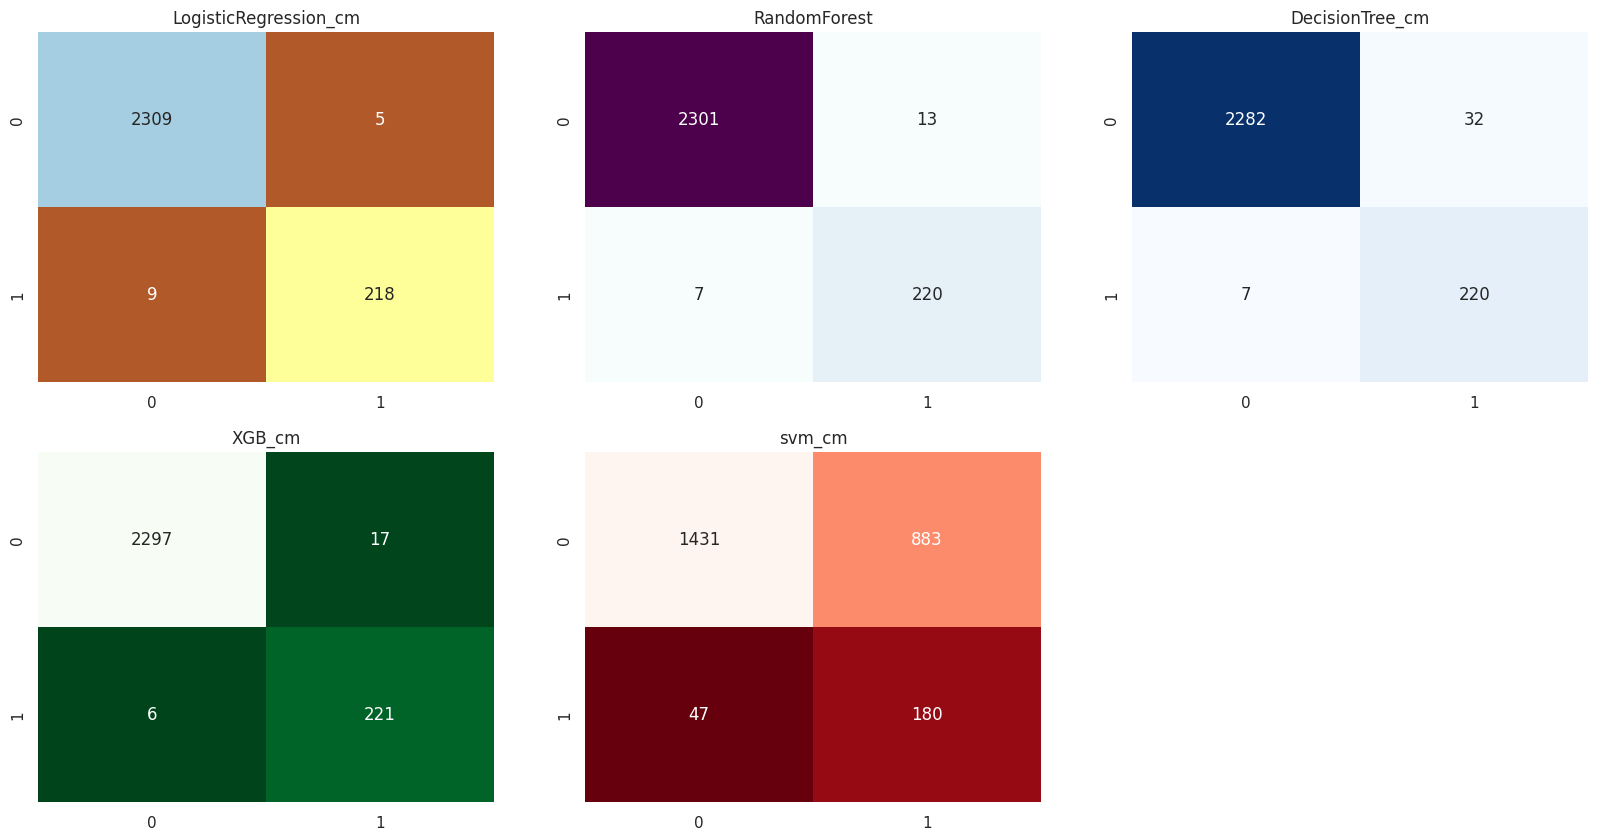

In [151]:
plt.figure(figsize=(20,10))
target_names = ["continue", "exit"]

plt.subplot(2,3,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Paired_r",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="BuPu",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("XGB_cm")
sns.heatmap(XGB_cm,annot=True,cmap="Greens_r",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("svm_cm")
sns.heatmap(svm_cm,annot=True,cmap="Reds_r",fmt="d",cbar=False)

In [152]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('XGB_accuracy:\t\t\t',XGB_ac)
print('SVM_accuracy:\t\t\t',svm_ac)

LogisticRegression_accuracy:	 0.9944903581267218
RandomForest_accuracy:		 0.9921290830381739
DecisionTree_accuracy:		 0.9846517119244392
XGB_accuracy:			 0.9909484454939
SVM_accuracy:			 0.6340023612750886


In [153]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))

    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))

    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

<Figure size 500x500 with 0 Axes>

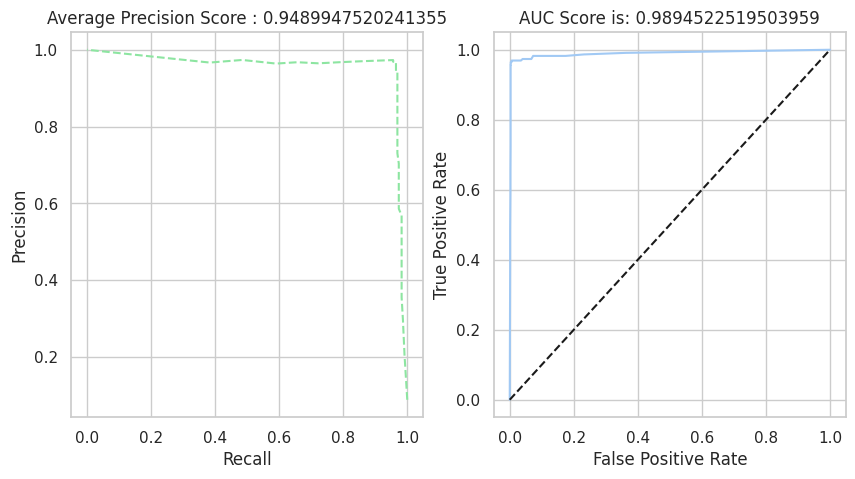

<Figure size 500x500 with 0 Axes>

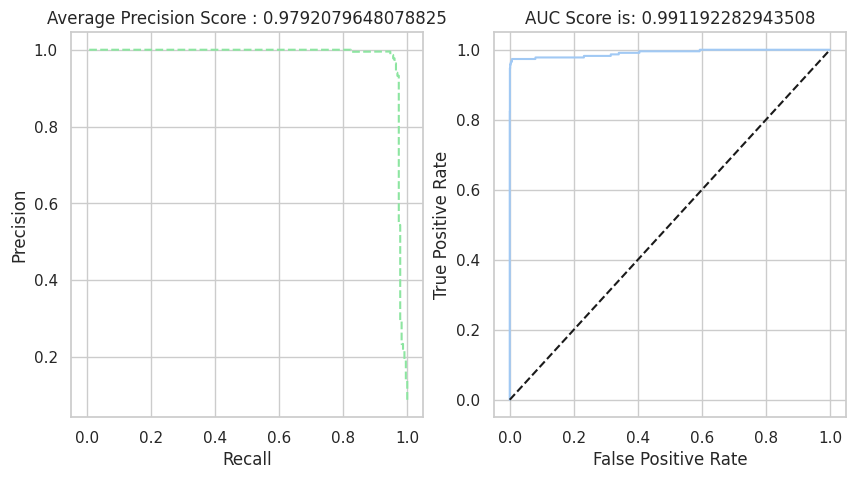

In [154]:
plt.figure()
plotting(y_val ,rdf_c.predict_proba(x_val))

plt.figure()
plotting(y_val ,XGB.predict_proba(x_val))

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
print('precision_score of LR: ', precision_score(lr_pred, y_val))
print('precision_score of random forest : ', precision_score(rdf_pred, y_val))
print('precision_score of DTree: ', precision_score(dtree_pred, y_val))
print('precision_score of XGB: ', precision_score(XGB_pred, y_val))
print('precision_score of SVM: ', precision_score(svm_pred, y_val))

precision_score of LR:  0.960352422907489
precision_score of random forest :  0.9691629955947136
precision_score of DTree:  0.9691629955947136
precision_score of XGB:  0.973568281938326
precision_score of SVM:  0.7929515418502202


In [156]:
print('recall_score of LR: ', recall_score(lr_pred, y_val))
print('recall_score of random forest : ', recall_score(rdf_pred, y_val))
print('recall_score of DTree: ', recall_score(dtree_pred, y_val))
print('recall_score of XGB: ', recall_score(XGB_pred, y_val))
print('recall_score of SVM: ', recall_score(svm_pred, y_val))

recall_score of LR:  0.9775784753363229
recall_score of random forest :  0.944206008583691
recall_score of DTree:  0.873015873015873
recall_score of XGB:  0.9285714285714286
recall_score of SVM:  0.16933207902163688


In [157]:
print('f1_score of LR: ', f1_score(lr_pred, y_val))
print('f1_score of random forest : ', f1_score(rdf_pred, y_val))
print('f1_score of DTree: ', f1_score(dtree_pred, y_val))
print('f1_score of XGB: ', f1_score(XGB_pred, y_val))
print('f1_score of SVM: ', f1_score(svm_pred, y_val))

f1_score of LR:  0.9688888888888889
f1_score of random forest :  0.9565217391304348
f1_score of DTree:  0.918580375782881
f1_score of XGB:  0.9505376344086022
f1_score of SVM:  0.27906976744186046


LR: 0.993140 (0.004527)
random forest: 0.993554 (0.006270)
DTree: 0.982893 (0.018947)
XGB: 0.993554 (0.006599)
svm: 0.910909 (0.010653)


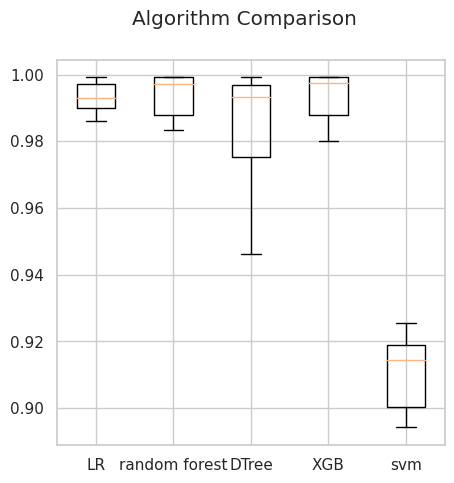

In [158]:
from sklearn import model_selection
dataframe = df
array = dataframe.values

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('random forest',RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)))
models.append(('DTree', DecisionTreeClassifier(criterion='entropy',random_state=0)))
models.append(('XGB', XGBClassifier()))
models.append(('svm' , SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [159]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
n_estimators = [500,800,1000,2000]
max_depth = [3,5,8,10,11]
min_samples_split = [3,5]
min_samples_leaf = [1]

hyperF = dict (n_estimators = n_estimators, max_depth = max_depth,
               min_samples_split = min_samples_split,
               min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf , hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [160]:
gridF.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [161]:
gridF.best_score_

0.9850760103819058

In [162]:
model = RandomForestClassifier(n_estimators = 800, max_depth = 11,
                               min_samples_split = 3,min_samples_leaf = 1)
model.fit(x_val, y_val)
model_pred=model.predict(x_val)
model_cm=confusion_matrix(y_val,model_pred)
model_ac=accuracy_score(model_pred,y_val)

In [163]:
print('RandomForest_accuracy:\t\t',model_ac)
print('recall_score : ', recall_score(model_pred, y_val))
print('precision_score : ', precision_score(model_pred, y_val))
print('f1_score : ', f1_score(model_pred, y_val))

RandomForest_accuracy:		 0.9964580873671782
recall_score :  1.0
precision_score :  0.960352422907489
f1_score :  0.9797752808988764


<Axes: >

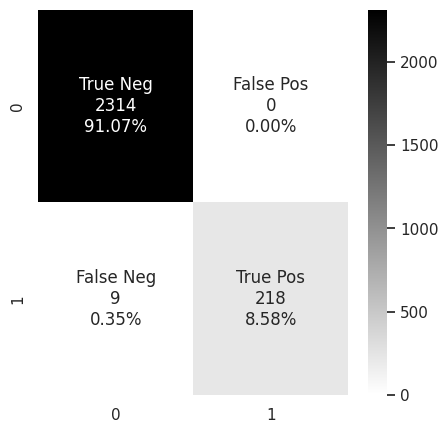

In [164]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     model_cm.flatten()/np.sum(model_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(model_cm, annot=labels, fmt='', cmap='binary')

In [165]:
accuracy = model.score(x_test, y_test)
print("Accuracy is %.2f %%" %(accuracy * 100))

Accuracy is 99.37 %


In [166]:
pred_classes = model.predict(x_test)

print("Predicted classes:")
print(pred_classes)
print("Actual classes:")
print(y_test)

Predicted classes:
[0 0 1 ... 0 1 0]
Actual classes:
1300     0
8033     0
5853     1
1475     0
1416     0
        ..
11861    0
3933     0
3906     1
4760     1
11628    0
Name: discent, Length: 3630, dtype: int64


In [167]:
from sklearn.metrics import roc_auc_score

In [168]:
y_pred = model.predict(x_test)
print("Roc_auc_score: ",roc_auc_score(y_test,y_pred)*100,"%")

Roc_auc_score:  96.36075949367088 %


In [169]:
model_T = RandomForestClassifier(n_estimators = 800, max_depth = 11,
                                 min_samples_split = 3, min_samples_leaf = 1)
model_T.fit(x_test, y_test)
model_pred=model_T.predict(x_test)
model_cm=confusion_matrix(y_test,model_pred)
model_ac=accuracy_score(model_pred,y_test)

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
print('RandomForest_accuracy:\t\t',model_ac)
print('recall_score : ', recall_score(model_pred, y_test))
print('precision_score : ', precision_score(model_pred, y_test))
print('f1_score : ', f1_score(model_pred, y_test))

RandomForest_accuracy:		 0.9942148760330578
recall_score :  1.0
precision_score :  0.9335443037974683
f1_score :  0.9656301145662847


In [171]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))

    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))

    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

<Figure size 500x500 with 0 Axes>

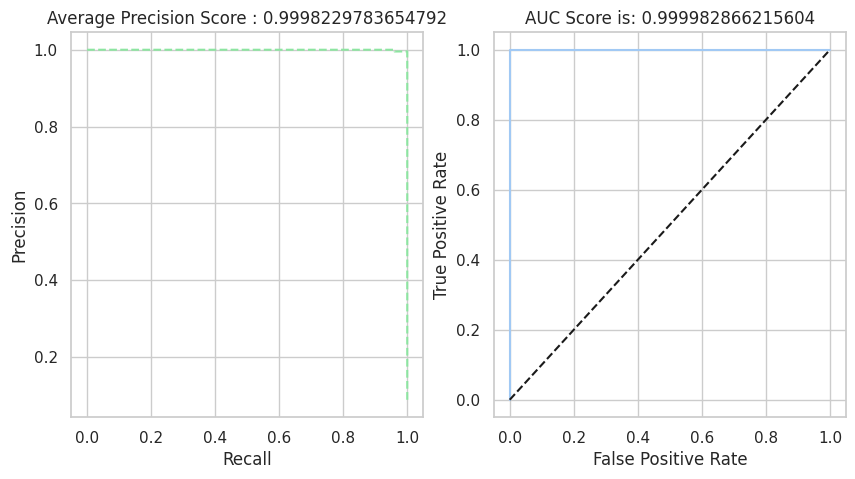

In [172]:
plt.figure()
plotting(y_val ,model.predict_proba(x_val))

In [173]:
import sklearn.metrics as metrics
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))

    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))

    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

<Figure size 500x500 with 0 Axes>

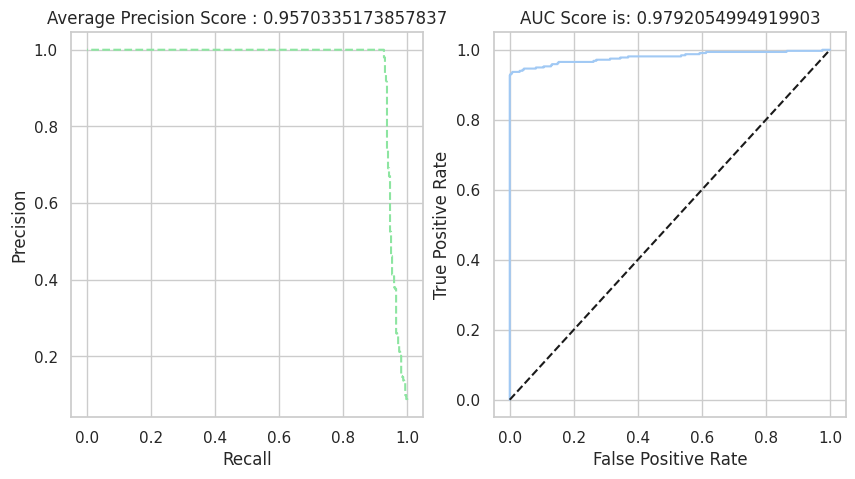

In [174]:
plt.figure()
plotting(y_test ,model.predict_proba(x_test))

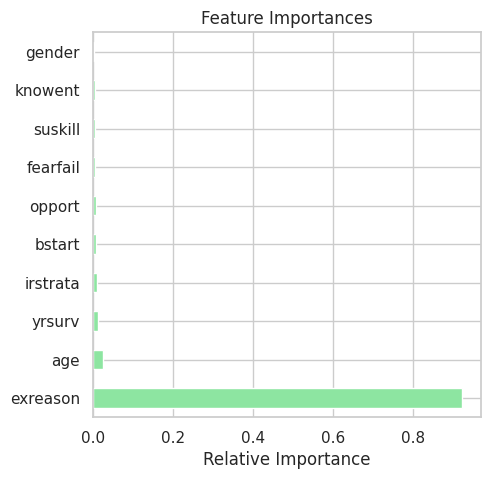

In [175]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh', color='g',)
plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='g', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [178]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

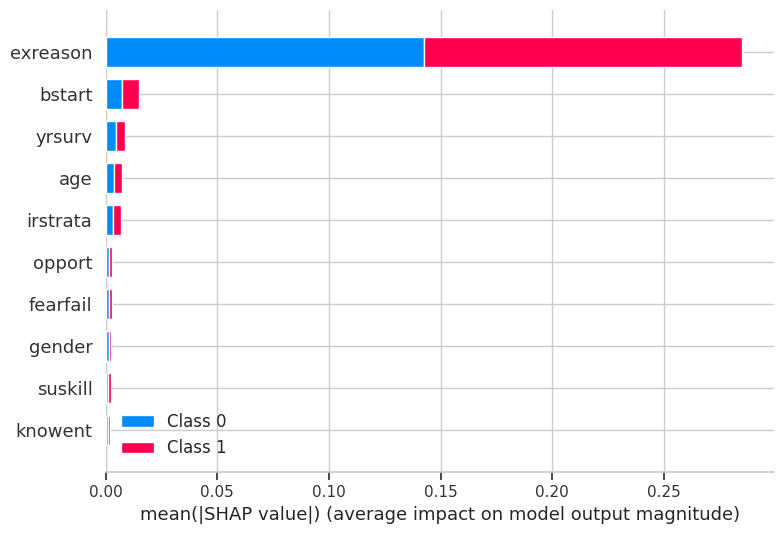

In [179]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [180]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

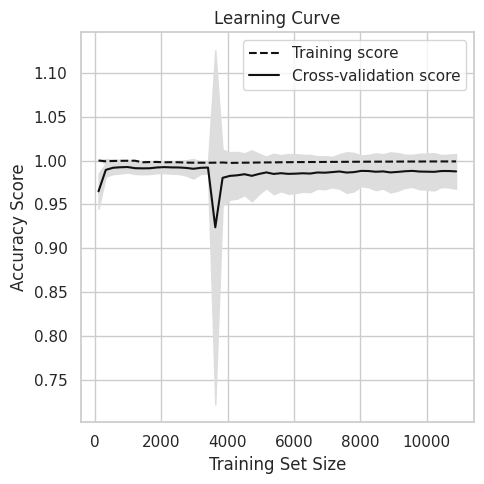

In [181]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        x, y,
                                                        # Number of folds in coss-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [182]:
# save the model to disk with pickle
from pickle import dump
filename = 'finalized_RandomForest_GEM_model-E.sav'
dump(model, open(filename, 'wb'))

In [183]:
# load the model from disk with pickle
from pickle import load
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.99366391184573
